In [8]:
import numpy as np

eigenvalue=np.load('eigenvalue_4096.npy')
eigenvector=np.load('eigenvector_4096.npy')

In [9]:
import pyAF.constants
pc=pyAF.constants.physical_constants()
omega=[]
nmodes=len(eigenvalue)
#extract minimum index of negative frequency
mode_negative=0
for i in range(nmodes):
    if eigenvalue[i] <0.0:
        val=0
        omega.append(val)
        mode_negative=i
    else:
        val=np.sqrt(eigenvalue[i])*pc.scale_THz
        omega.append(val)

In [10]:
from ase.io import read
atoms=read('/home/emi/lammps/aSi-4096/optimized.data',format='lammps-data',style='atomic')
natom=len(atoms.positions)

In [11]:
kmin=2.0*np.pi/atoms.cell[0,0]
kmin

0.1435217304294301

check ver1, ver2, ver3

energy THz 2.1529840281837593, energy meV 8.904031455838728


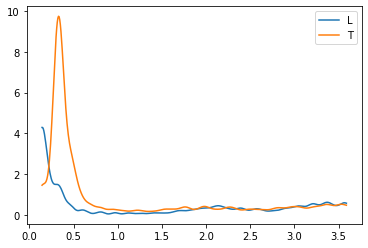

In [12]:
import pyAF.postprocess


id=200
n_sample=10
E=omega[id]
print(f'energy THz {E}, energy meV {E*4.13567}')
position=atoms.positions
ev=eigenvector[:,id]

kvec=np.linspace(kmin,kmin*25,500)
C_L=[]
C_T=[]
for k in kvec:
    k_vector=pyAF.postprocess.polar_coord_sampling(n_sample,k)
    tmp_L=np.zeros(n_sample*n_sample)
    tmp_T=np.zeros(n_sample*n_sample)
    for i,vec in enumerate(k_vector):

        unit_vector_L=vec/np.linalg.norm(vec)
        tmp_L[i], tmp_T[i]=pyAF.postprocess.get_Ci_ver2(ev,position,vec)
    C_L.append(np.mean(tmp_L))
    C_T.append(np.mean(tmp_T))


import matplotlib.pyplot as plt
plt.plot(kvec,C_L,label='L')
plt.plot(kvec,C_T,label='T')
plt.legend()

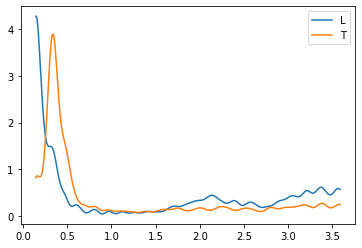

In [13]:
kvec=np.linspace(kmin,kmin*25,500)
C_L=[]
C_T=[]
for k in kvec:
    k_vector=pyAF.postprocess.polar_coord_sampling(n_sample,k)
    tmp_L=np.zeros(n_sample*n_sample)
    tmp_T=np.zeros(n_sample*n_sample)
    for i,vec in enumerate(k_vector):

        unit_vector_L=vec/np.linalg.norm(vec)
        tmp_L[i], tmp_T[i]=pyAF.postprocess.get_Ci_ver1(ev,position,vec)
    C_L.append(np.mean(tmp_L))
    C_T.append(np.mean(tmp_T))


import matplotlib.pyplot as plt
plt.plot(kvec,C_L,label='L')
plt.plot(kvec,C_T,label='T')
plt.legend()

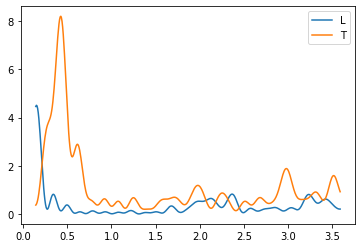

In [14]:
kvec=np.linspace(kmin,kmin*25,500)
C_L=[]
C_T=[]
for k in kvec:
    cl, ct=pyAF.postprocess.get_Ci_ver3(ev,position,k)
    C_L.append(cl)
    C_T.append(ct)


import matplotlib.pyplot as plt
plt.plot(kvec,C_L,label='L')
plt.plot(kvec,C_T,label='T')
plt.legend()